# Exploratory Data Analysis
 #####  Descriptive Analysis Notebook

In [11]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Loading in the training data**

In [12]:
# Loading in training data using pandas
data = pd.read_parquet('../data/training_data.parquet')
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
526628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,airplane
300812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spreadsheet
267477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,airplane
434398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spreadsheet
205051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spreadsheet


**Plotting the frquencies of the classes. The training and testing datasets were stratified by class, meaning they will have the same distribution of classes, mitigating the effects of bias during model training.**

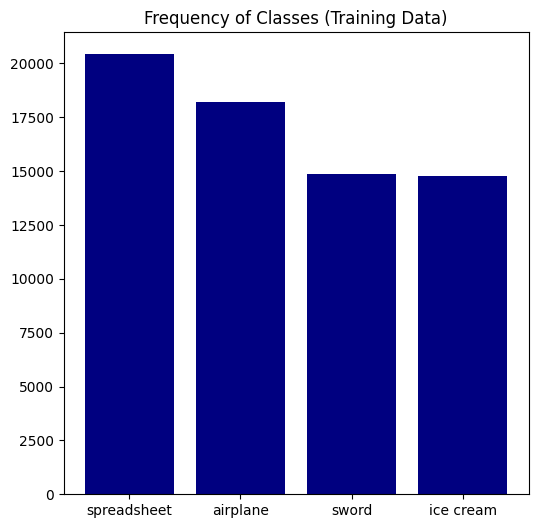

In [13]:
# Plotting frequencies of the classes

frequencies = data['label'].value_counts().reset_index()

plt.figure(figsize = (6, 6))
plt.bar(frequencies['label'], frequencies['count'], color = 'navy')
plt.title("Frequency of Classes (Training Data)")
plt.savefig("../output/class_frequencies.png")
plt.show()

**Plotting sample visualizations, to give an idea of the data we are working with**

Visualizing 10 random sketches


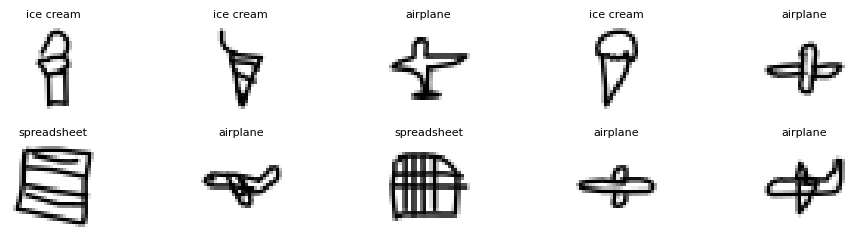

In [14]:
N_IMAGES = 10
N_COLS = 5
N_ROWS = int(np.ceil(N_IMAGES / N_COLS))

# Sample N_IMAGES random rows from the DataFrame
data_sample = data.sample(n=N_IMAGES, random_state = 42).reset_index(drop=True)

# Set up the plot grid
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(10, 2.5))
axes = axes.flatten()

print(f"Visualizing {N_IMAGES} random sketches")

# Loop through the sample and plot each sketch
for i in range(N_IMAGES):
    sketch_data = data_sample.iloc[i]

    # Separate label and pixel data
    label = sketch_data['label']
    pixel_features = sketch_data.drop('label').values
    
    # Ensure correct numerical type
    pixel_features = pixel_features.astype(np.float32)

    # Reshape the 784 features into a 28x28 image
    image_matrix = pixel_features.reshape(28, 28)

    # Plot the image on the corresponding subplot
    axes[i].imshow(image_matrix, cmap = 'gray_r')
    axes[i].set_title(f"{label}", fontsize = 8)
    axes[i].axis('off')


# Show plot
plt.tight_layout()
plt.savefig("../output/sample_images.png")
plt.show()

**Plotting the pixel-wise average image for each class, to see which combinations of classes may be problematic for a classification model. The ice-cream and sword images may be difficult to differentiate from one another, as may the airplane and spreadsheet images.**

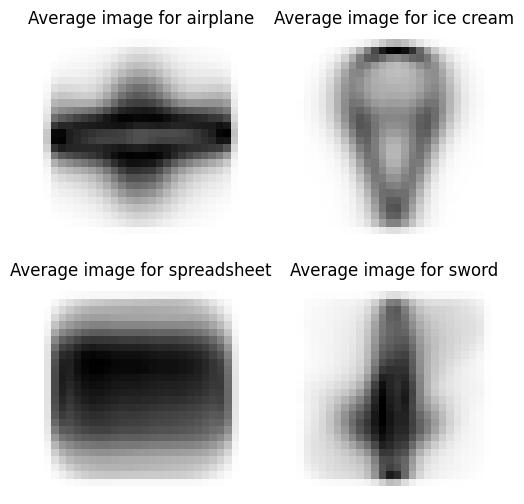

In [15]:
avg_img = data.groupby('label').mean().reset_index()
avg_img.head()

fig, axes = plt.subplots(2, 2, figsize = (6, 6))

for i, ax in enumerate(axes.flatten()):
    img = avg_img.iloc[i, 1:].to_numpy().astype(np.float32).reshape(28, 28)
    ax.imshow(img, cmap='gray_r')
    ax.set_title(f'Average image for {avg_img.iloc[i, 0]}')
    ax.axis('off')

plt.savefig("../output/average_image.png")
plt.show()

**Visualizing the per-pixel variance, to see which pixels may contribute most heavily to the classification models.**

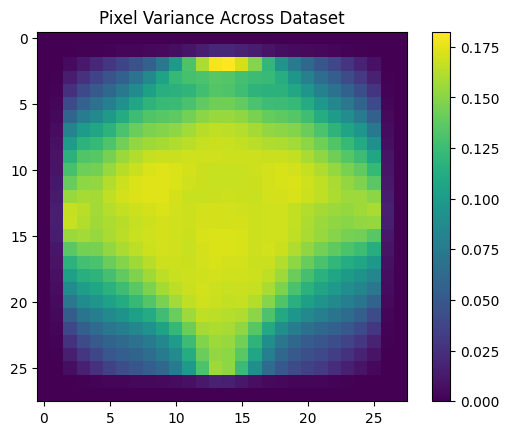

In [16]:
pixel_var = data.iloc[:, :-1].var()

plt.imshow(pixel_var.values.reshape(28,28), cmap='viridis')
plt.colorbar()
plt.title('Pixel Variance Across Dataset')
plt.savefig("../output/total_var.png")
plt.show()


**Visualizing the per-pixel variance by class, to see how each class contributes to the overall variance in the data**

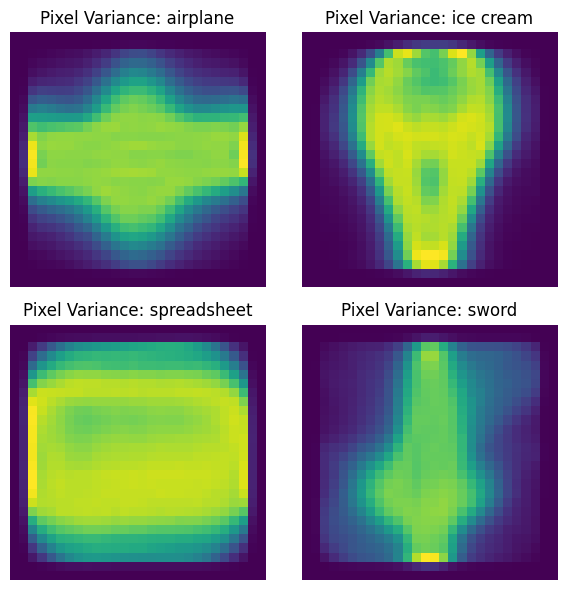

In [17]:
# Identify pixel columns
pixel_cols = data.columns[:-1]

# Compute pixel variance per class
var_img = data.groupby('label')[pixel_cols].var().reset_index()

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

for i, ax in enumerate(axes.flatten()):

    # Get variance image for this class
    img = var_img.iloc[i, 1:].to_numpy().astype(np.float32).reshape(28, 28)

    # Plot heatmap
    ax.imshow(img, cmap='viridis')
    ax.set_title(f'Pixel Variance: {var_img.iloc[i, 0]}')
    ax.axis('off')

plt.tight_layout()
plt.savefig("../output/class_var.png")
plt.show()
